# **Pokemon (Mega Evolution)**

**Import Required Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

**Load and Prepare the Data**

In [2]:
# Load Pokémon data from CSV
file_path = "C:/Users/SHIVANI/OneDrive/Desktop/code/AI-ML/Pokemon.csv"
data = pd.read_csv(file_path)

In [3]:
# Identify Mega Evolutions in the dataset
data['Mega_Evolution'] = data['Name'].apply(lambda x: 'Yes' if 'Mega' in x else 'No')

**Feature Selection and Preprocessing**

In [4]:
# Select relevant features for prediction
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [5]:
# Removes rows with missing values.
data = data.dropna(subset=features)

In [6]:
# Define features and target variable
X = data[features] #INPUT 
y = data['Mega_Evolution'] #OUT

In [7]:
# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Model Training**

In [8]:
# Create and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Model Evaluation**

Predictions and Confusion Matrix

In [9]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[216   7]
 [ 10   7]]


ROC Curve and AUC Calculation

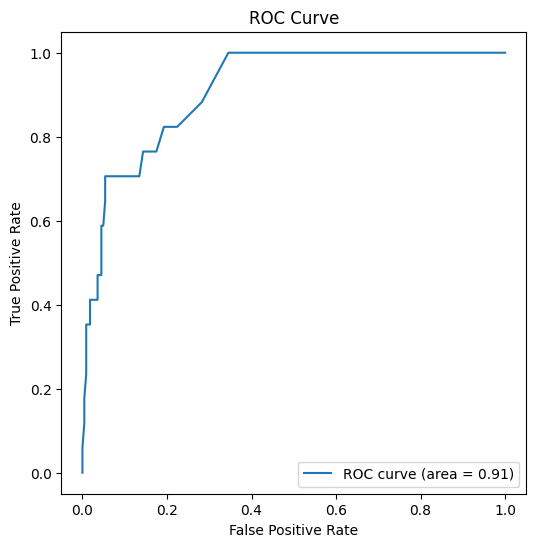

In [10]:
# Calculate probabilities for the positive class (Mega Evolution: 'Yes')
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Precision-Recall Curve

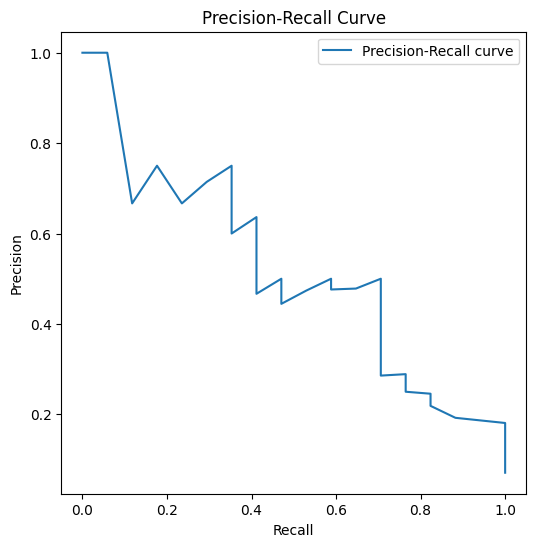

In [11]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label='Yes')

# Plot the precision-recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**Save Final Predictions**

In [12]:
# Predict Mega Evolution status for the entire dataset
data['Predicted_Mega_Evolution'] = model.predict(X)

# Create output DataFrame with relevant columns
output_df = data[['Name', 'Predicted_Mega_Evolution']]
output_df.columns = ['Pokemon', 'Mega_Evolution']

# Save predictions to a CSV file
output_path = "C:/Users/SHIVANI/OneDrive/Desktop/code/AI-ML/attempt7.csv"
output_df.to_csv(output_path, index=False)
print(f"Predictions are saved successfully at: {output_path}")


Predictions are saved successfully at: C:/Users/SHIVANI/OneDrive/Desktop/code/AI-ML/attempt7.csv
